In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('5DATA002W.2 Coursework Dataset(25012025v6.0).csv')
df.head()

,Patient_ID,Month_of_Birth,Age,Sex,Occupation,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,A0012,12,68.0,Female,Teaching,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,A0013,12,50.0,Female,Medical,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,A0014,11,58.0,Female,Engineering,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,A0015,3,58.0,Female,Technology,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,84,Alive
4,A0016,1,47.0,Female,Multimedia,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,50,Alive


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4020 non-null   object 
 4   Occupation              43 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4024 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4023 non-null   

In [19]:
df.describe()

,Month_of_Birth,Age,Grade,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,4024.000000,4015.000000,4024.000000,4021.000000,4023.000000,4024.000000,4024.000000
mean,6.481362,54.107098,2.150596,30.419299,14.373602,4.158052,71.472167
std,3.475442,11.715528,0.638234,21.161080,8.129293,5.109331,25.361855
min,1.000000,-50.000000,1.000000,-75.000000,1.000000,1.000000,1.000000
25%,3.000000,47.000000,2.000000,16.000000,9.000000,1.000000,56.000000
50%,6.000000,54.000000,2.000000,25.000000,14.000000,2.000000,73.000000
75%,10.000000,61.000000,3.000000,38.000000,19.000000,5.000000,90.000000
max,12.000000,502.000000,4.000000,140.000000,61.000000,46.000000,760.000000


In [20]:
#drop unnecessary coloumns
df.drop(['Patient_ID','Month_of_Birth','Occupation'],axis='columns',inplace=True)

In [21]:
#count the missing values 
df.isnull().sum()

Age                       9
Sex                       4
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                3
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    1
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64

In [22]:
#handle the all missig values 
# Dropping rows with missing values since they represent less than 0.5% of the dataset.
df = df.dropna()


In [23]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("------")

Column: Age
[ 68.  50.  58.  47.  51.  40.  69.  46.  65.  48.  62.  61.  56.  43.
  60.  57.  55.  63.  66.  53.  59.  54.  49.  64.  42.  37.  67.  31.
  52.  33.  45.  38.  39.  36. 180.  41.  44. -50.  32.  34. 502.  35.
  30.  89.]
------
Column: Sex
['Female' '1']
------
Column: T_Stage
['T1' 'T2' 'T3' 'T4']
------
Column: N_Stage
['N1' 'N2' 'N3']
------
Column: 6th_Stage
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
------
Column: Differentiated
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
------
Column: Grade
[3 2 1 4]
------
Column: A_Stage
['Regional' 'Distant']
------
Column: Tumor_Size
[  4.  35.  63.  18.  41.  20.   8.  30. 103.  32.  13.  59.  15.  19.
  46.  24.  25.  29.  40.  70.  22.  50.  17.  21.  10.  27.  23.   5.
  51.   9.  55.  77.   2.  11.  12.  26.  75.  34. 120.  80.   3.  60.
  14.  16.  45.  36.  76.  38.  49.   7.  72. 100.  43.  62.  37.  68.
 -75.  52.  85.  57.  39.  28.  48. 110.  65.   6. 140.  42. 130.  31.


In [24]:
# Clean'Mortality_Status' ('Alive' or 'Dead')
df['Mortality_Status'] = df['Mortality_Status'].str.lower().str.capitalize()

In [25]:
#replace wrong values in 'SEX' coloumn
df['Sex'] = df['Sex'].replace('1', 'Male')

In [26]:
label_cols = ['T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Mortality_Status','Sex', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [27]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("------")

Column: Age
[ 68.  50.  58.  47.  51.  40.  69.  46.  65.  48.  62.  61.  56.  43.
  60.  57.  55.  63.  66.  53.  59.  54.  49.  64.  42.  37.  67.  31.
  52.  33.  45.  38.  39.  36. 180.  41.  44. -50.  32.  34. 502.  35.
  30.  89.]
------
Column: Sex
[0 1]
------
Column: T_Stage
[0 1 2 3]
------
Column: N_Stage
[0 1 2]
------
Column: 6th_Stage
[0 2 4 1 3]
------
Column: Differentiated
[1 0 3 2]
------
Column: Grade
[3 2 1 4]
------
Column: A_Stage
[1 0]
------
Column: Tumor_Size
[  4.  35.  63.  18.  41.  20.   8.  30. 103.  32.  13.  59.  15.  19.
  46.  24.  25.  29.  40.  70.  22.  50.  17.  21.  10.  27.  23.   5.
  51.   9.  55.  77.   2.  11.  12.  26.  75.  34. 120.  80.   3.  60.
  14.  16.  45.  36.  76.  38.  49.   7.  72. 100.  43.  62.  37.  68.
 -75.  52.  85.  57.  39.  28.  48. 110.  65.   6. 140.  42. 130.  31.
  90.  98.  47.  54.  61.  74.  33.   1.  87.  81.  58. 117.  44. 123.
 133.  95. 107.  92. 105.  56.  82.  66.  78.  97.  88.  53.  69.  83.
 101.  84. 115

In [28]:
df

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,0,0,0,1,3,1,4.0,1,1,24.0,1,60,0
1,50.0,0,1,1,2,0,2,1,35.0,1,1,14.0,5,62,0
2,58.0,0,2,2,4,0,2,1,63.0,1,1,14.0,7,75,0
3,58.0,0,0,0,0,1,3,1,18.0,1,1,2.0,1,84,0
4,47.0,0,1,0,1,1,3,1,41.0,1,1,3.0,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62.0,0,0,0,0,0,2,1,9.0,1,1,1.0,1,49,0
4020,56.0,0,1,1,2,0,2,1,46.0,1,1,14.0,8,69,0
4021,68.0,1,1,0,1,0,2,1,22.0,1,0,11.0,3,69,0
4022,58.0,0,1,0,1,0,2,1,44.0,1,1,11.0,1,72,0


In [29]:
df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,68.0,0,0,0,0,1,3,1,4.0,1,1,24.0,1,60,0
1,50.0,0,1,1,2,0,2,1,35.0,1,1,14.0,5,62,0
2,58.0,0,2,2,4,0,2,1,63.0,1,1,14.0,7,75,0
3,58.0,0,0,0,0,1,3,1,18.0,1,1,2.0,1,84,0
4,47.0,0,1,0,1,1,3,1,41.0,1,1,3.0,1,50,0


In [30]:
 #identify the univariate outliers

In [31]:
outl_cols = df[['Age','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']]

In [32]:
for col in outl_cols:
    fig = px.box(df,x=col,title='f"Box Plot - {col}')
    fig.show()

drop the outliers using IQR method 

In [33]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [34]:
for col in ['Age','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
    df = remove_outliers(df,col)

In [35]:
for col in outl_cols:
    fig = px.box(df,x=col,title='f"Box Plot - {col}')
    fig.show()

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,3254.0,3.340905e-16,1.000154,-2.689088,-0.781802,0.003551,0.788904,1.686451
Sex,3254.0,5.224339e-03,0.072102,0.000000,0.000000,0.000000,0.000000,1.000000
T_Stage,3254.0,6.515058e-01,0.676060,0.000000,0.000000,1.000000,1.000000,3.000000
N_Stage,3254.0,2.138906e-01,0.425563,0.000000,0.000000,0.000000,0.000000,2.000000
6th_Stage,3254.0,8.998156e-01,0.859181,0.000000,0.000000,1.000000,2.000000,4.000000
Differentiated,3254.0,6.899201e-01,1.039066,0.000000,0.000000,0.000000,1.000000,3.000000
Grade,3254.0,2.117087e+00,0.629335,1.000000,2.000000,2.000000,3.000000,4.000000
A_Stage,3254.0,9.932391e-01,0.081959,0.000000,1.000000,1.000000,1.000000,1.000000
Tumor_Size,3254.0,3.275397e-17,1.000154,-1.716274,-0.748187,-0.264143,0.427347,3.055011
Estrogen_Status,3254.0,9.452981e-01,0.227432,0.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
# Visualize the distribution of each numeric freature
for col in df.columns:
    fig = px.histogram(df, x=col, title=f"Histogram - {col}")
    fig.show()


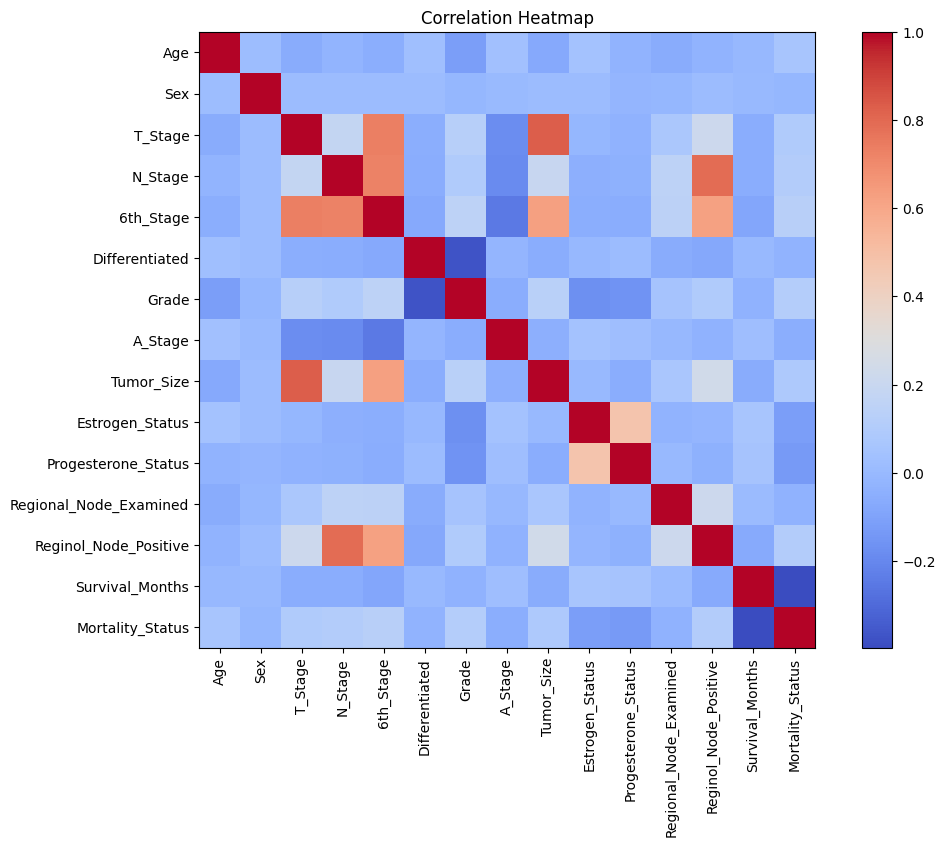

In [49]:
# Visualize the relationship between variables using heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
plt.title('Correlation Heatmap')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Scale the Data set 

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#scale the dataset using StandardScaler method 
numeric_cols = ['Age','Tumor_Size','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']
scaler = StandardScaler()
# Apply MinMaxScaler to the numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [39]:
df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
0,1.574258,0,0,0,0,1,3,1,-1.508826,1,1,1.540617,-0.777956,-0.598224,0
1,-0.445222,0,1,1,2,0,2,1,0.634794,1,1,0.135463,1.430524,-0.505220,0
2,0.452325,0,2,2,4,0,2,1,2.570968,1,1,0.135463,2.534764,0.099306,0
3,0.452325,0,0,0,0,1,3,1,-0.540740,1,1,-1.550721,-0.777956,0.517825,0
4,-0.781802,0,1,0,1,1,3,1,1.049689,1,1,-1.410206,-0.777956,-1.063245,0


In [40]:
#create a dataset for predict breast cancer mortality status.
dataset_mortality = df.drop(columns=['Survival_Months'])
dataset_mortality.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,1.574258,0,0,0,0,1,3,1,-1.508826,1,1,1.540617,-0.777956,0
1,-0.445222,0,1,1,2,0,2,1,0.634794,1,1,0.135463,1.430524,0
2,0.452325,0,2,2,4,0,2,1,2.570968,1,1,0.135463,2.534764,0
3,0.452325,0,0,0,0,1,3,1,-0.540740,1,1,-1.550721,-0.777956,0
4,-0.781802,0,1,0,1,1,3,1,1.049689,1,1,-1.410206,-0.777956,0


In [41]:
#create a dataset for predict breast cancer survival status.
dataset_survival = df.drop(columns=['Mortality_Status'])
dataset_survival.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
0,1.574258,0,0,0,0,1,3,1,-1.508826,1,1,1.540617,-0.777956,-0.598224
1,-0.445222,0,1,1,2,0,2,1,0.634794,1,1,0.135463,1.430524,-0.505220
2,0.452325,0,2,2,4,0,2,1,2.570968,1,1,0.135463,2.534764,0.099306
3,0.452325,0,0,0,0,1,3,1,-0.540740,1,1,-1.550721,-0.777956,0.517825
4,-0.781802,0,1,0,1,1,3,1,1.049689,1,1,-1.410206,-0.777956,-1.063245


In [42]:
#save both datasets as csv file 
dataset_survival.to_csv("survival_prediction_dataset.csv", index=False)
dataset_mortality.to_csv("mortality_prediction_dataset.csv", index=False)